# **Campus Placement Prediction**



#**1. Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline


#**2. Importing Dataset**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Placement_Data_Full_Class.csv to Placement_Data_Full_Class (2).csv


In [ ]:
import io
data=pd.read_csv(io.BytesIO(uploaded['Placement_Data_Full_Class.csv']))
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


###**Inference**



*   Dataset consists of Gender, Educational Qualification and performance, status of placement and salary details.
*   Here Status of placement is target variable and all other variables except salary are independent variable.



In [ ]:
data.shape

(215, 15)



*   The Dataset consists of 215 Rows and 15 Columns






In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
print('Count of null values in each column:',data.isnull().sum(),sep='\n')

Count of null values in each column:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


*   Dataset has 1 integer, 8 object and 6 float datatypes.
*   No other columns have missing values except salary column. 
  There are 148 non-null values in salary column i.e. 67 null values which shows that 67 candidates weren't placed.
  * We can't drop these values as they give information on candidates who weren't placed.
  * Imputing values with mean/median would be very wrong because candidates who weren't placed can't get salary.
  * So we impute these values with 0. 


#**3. Data Cleaning**


####**a. Droping Serial Number**

In [ ]:
data = data.drop('sl_no',axis=1)


####**b. Imputing null values in Salary column with 0**

In [ ]:
data['salary'].fillna(0,inplace=True)
data['salary'].isnull().sum()

0

####**c. Checking for outliers**

Text(0.5, 1.0, 'MBA percentage')

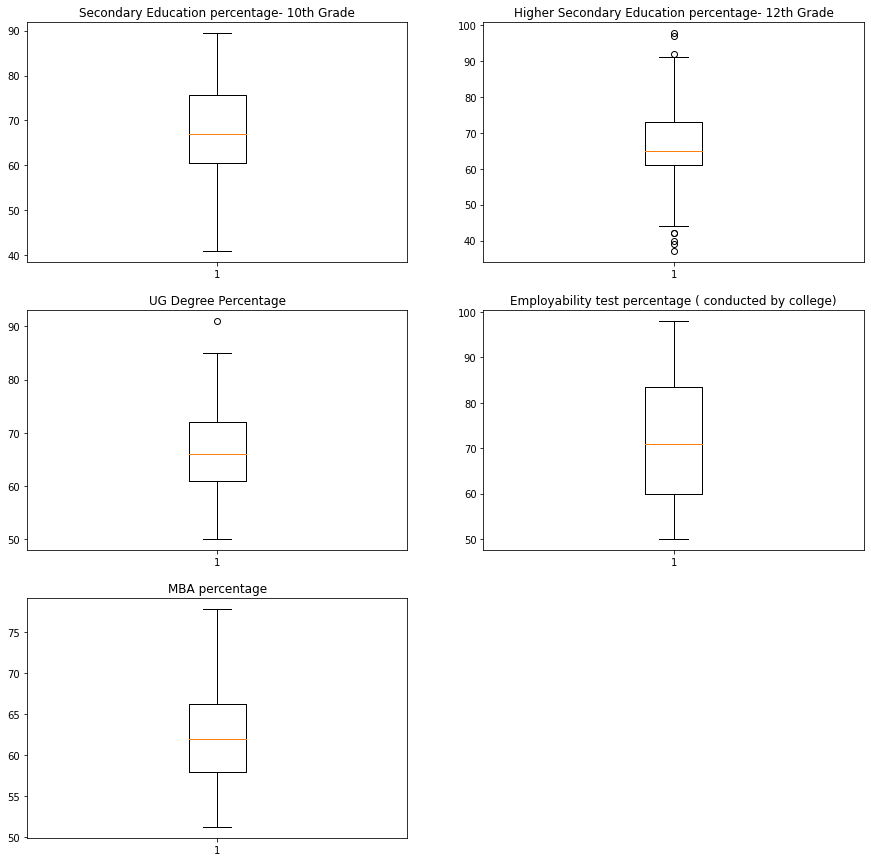

In [ ]:
plt.figure(figsize = (15, 15))

ax=plt.subplot(321)
plt.boxplot(data['ssc_p'])
ax.set_title('Secondary Education percentage- 10th Grade')

ax=plt.subplot(322)
plt.boxplot(data['hsc_p'])
ax.set_title('Higher Secondary Education percentage- 12th Grade')

ax=plt.subplot(323)
plt.boxplot(data['degree_p'])
ax.set_title('UG Degree Percentage')

ax=plt.subplot(324)
plt.boxplot(data['etest_p'])
ax.set_title('Employability test percentage ( conducted by college)')

ax=plt.subplot(325)
plt.boxplot(data['mba_p'])
ax.set_title('MBA percentage')



**Here we can see that only hsc_p column has outliers.**

In [ ]:
Q1 = data['hsc_p'].quantile(0.25)
Q3 = data['hsc_p'].quantile(0.75)
IQR = Q3 - Q1   

data[(data['hsc_p'] <= Q1 - 1.5 * IQR) | (data['hsc_p'] >= Q3 + 1.5 *IQR)]



,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
24,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.0
42,M,49.00,Others,39.00,Central,Science,65.00,Others,No,63.00,Mkt&Fin,51.21,Not Placed,0.0
49,F,50.00,Others,37.00,Others,Arts,52.00,Others,No,65.00,Mkt&HR,56.11,Not Placed,0.0
120,M,58.00,Others,40.00,Others,Science,59.00,Comm&Mgmt,No,73.00,Mkt&HR,58.81,Not Placed,0.0
134,F,77.44,Central,92.00,Others,Commerce,72.00,Comm&Mgmt,Yes,94.00,Mkt&Fin,67.13,Placed,250000.0
169,M,59.96,Others,42.16,Others,Science,61.26,Sci&Tech,No,54.48,Mkt&HR,65.48,Not Placed,0.0
177,F,73.00,Central,97.00,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
206,M,41.00,Central,42.00,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,0.0


These are the 8 outliers present in the hsc_p column. There is no need to do anything about them as they are true outliers.

#**4. Data Visualisation**

####**a. Count of Categorical features**

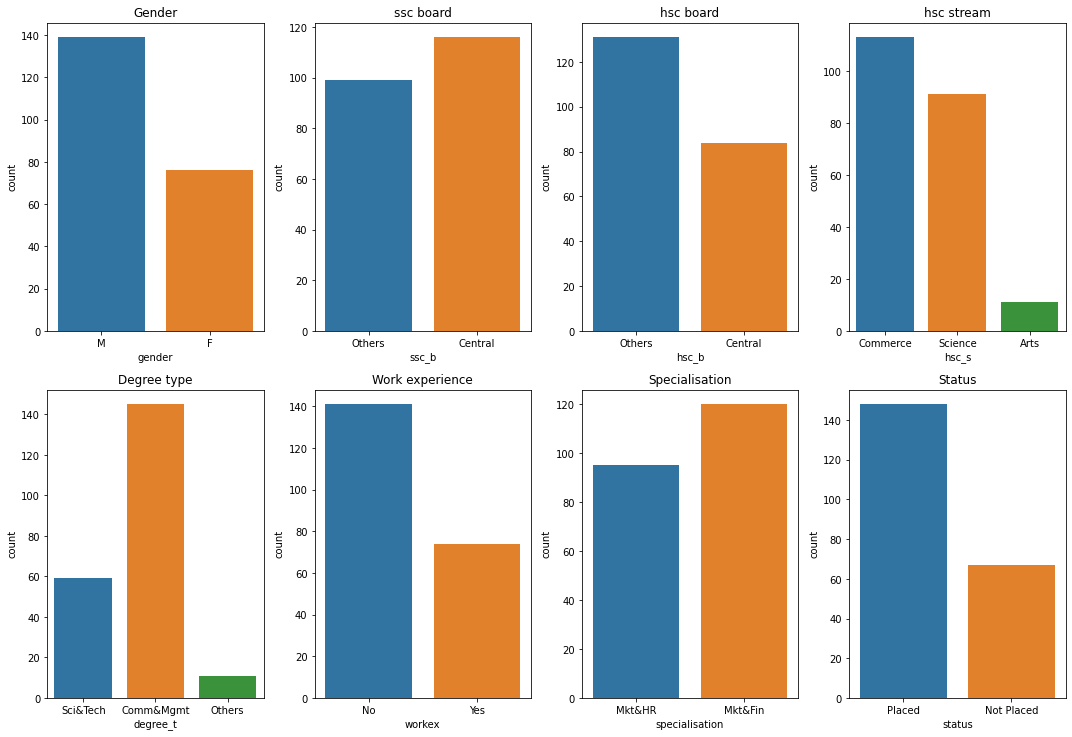

In [ ]:
plt.figure(figsize = (15, 15))
 
 
 
#Gender
ax=plt.subplot(341)
sns.countplot(x="gender", data=data)
ax.set_title('Gender')
 
#ssc_b
ax=plt.subplot(342)
sns.countplot(x="ssc_b", data=data)
ax.set_title('ssc board')
 
#hsc_b
ax=plt.subplot(343)
sns.countplot(x="hsc_b", data=data)
ax.set_title('hsc board')
 
 
#hsc_s
ax=plt.subplot(344)
sns.countplot(x="hsc_s", data=data)
ax.set_title('hsc stream')
 
 
#Degree type
ax=plt.subplot(345)
sns.countplot(x="degree_t", data=data)
ax.set_title('Degree type')
 
 
#Work experience
ax=plt.subplot(346)
sns.countplot(x="workex", data=data)
ax.set_title('Work experience')
 
 
#Specialisation
ax=plt.subplot(347)
sns.countplot(x="specialisation", data=data)
ax.set_title('Specialisation')
 
#Status of recruitment
ax=plt.subplot(348)
sns.countplot(x="status", data=data)
ax.set_title('Status')
 
plt.tight_layout()

**Inference**


*   Dataset has more male candidates than female.
*   We can see that there are more candidates from central board in ssc and other boards in hsc.
*   In hsc stream dataset has more candidates from commerce stream,then science and very few from arts.
*   In degree type it has more candidates from commerce and management.
*   Candidates with no work experience are more.
*   In pg specialisation it has more candidates from Marketing and Finance.
*   Most of the candidates from this dataset are placed .




####**b. Comparing proportions of people placed from each stream,degree type and specialisation**



*  **hsc stream**




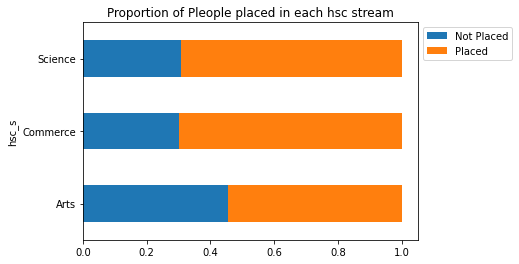

In [ ]:

stream=pd.crosstab(data.hsc_s,data.status)
stream.div(stream.sum(1),axis=0).plot(kind="barh", stacked=True,title='Proportion of Pleople placed in each hsc stream');
plt.legend(bbox_to_anchor =(1, 1));


**Inference**


*   Proportion of people placed from science and commerce stream is almost same.
*   Portion of people placed from arts stream is less as compared to science and commerce.



--------------------------------------------------------------------------------------------


* **Degree Type**

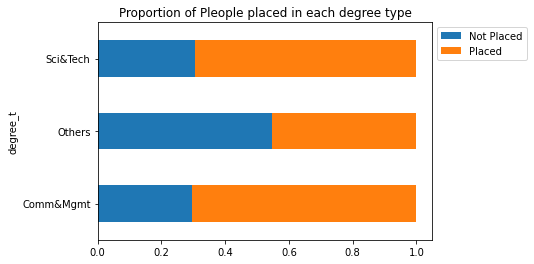

In [ ]:
degree=pd.crosstab(data.degree_t,data.status)
degree.div(degree.sum(1),axis=0).plot(kind="barh", stacked=True,title='Proportion of Pleople placed in each degree type');
plt.legend(bbox_to_anchor =(1, 1));

**Inference**

*   Proportion of people placed from Sci&Tech and Comm&Mgmt is almost same.
*   Proportion of people placed from other degree is less as compared to Sci&Tech and Comm&Mgmt.



-------------------------------------------------------------------------------------------------

* **Specialisation**

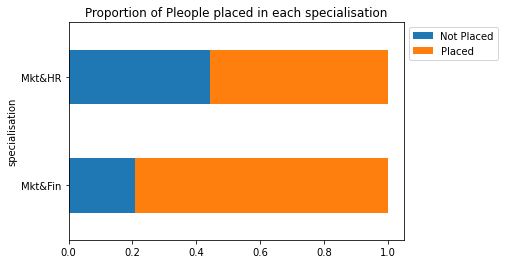

In [ ]:
specialisation=pd.crosstab(data.specialisation,data.status)
specialisation.div(specialisation.sum(1),axis=0).plot(kind="barh", stacked=True,title='Proportion of Pleople placed in each specialisation');
plt.legend(bbox_to_anchor =(1, 1));

**Inference**

*   Proportion of people placed from Marketing & Finance is more as compared to Marketing & HR.



####**c. Salary Distribution**

In [ ]:
print('Mean Salary:', st.mean(data['salary']))
print('Median Salary:', st.median(data['salary']))
print('Maximum Salary',data['salary'].max())



Mean Salary: 198702.32558139536
Median Salary: 240000.0
Maximum Salary 940000.0


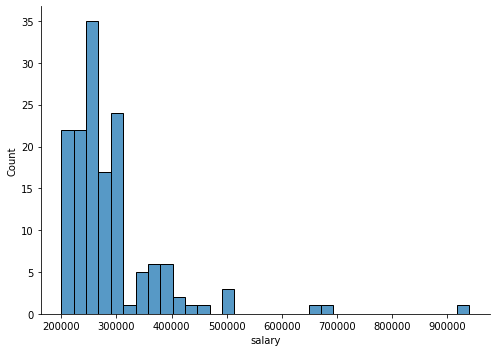

In [ ]:
data_placed=data[data['status']=='Placed']
sns.displot( data=data_placed,x=data_placed['salary'],kind="hist",aspect=1.4);

####**Inference**

*   Distribution of salary is positively skewed.
*   Candidates having package between 2L-3L PA are more.
*   Only one candidate got more than 9L PA.



####**d. How different factors influence a candidate in getting placed?**

In [ ]:
data1=data.copy()
cols = ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']
data1[cols] = data1[cols].apply(LabelEncoder().fit_transform)
data1.head(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


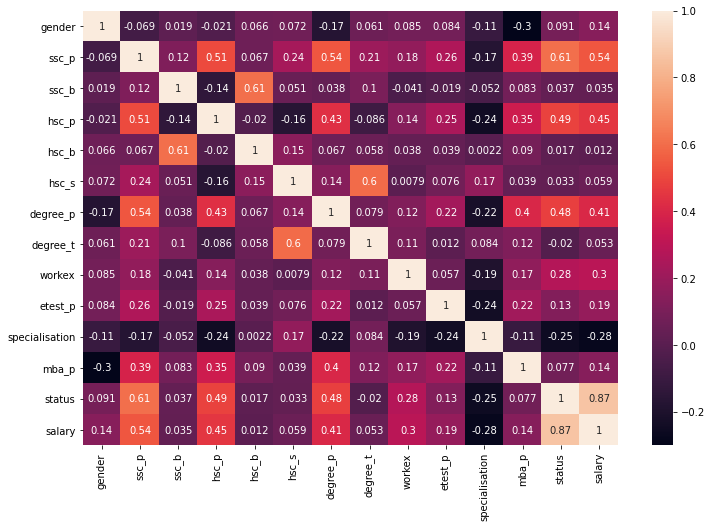

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(data1.corr(),annot=True)
plt.show()



Plot says that ssc %, degree % and hsc % are the most influencing factors in recruitment which is quite weird.

####**e. Does board of hsc and ssc matter?**

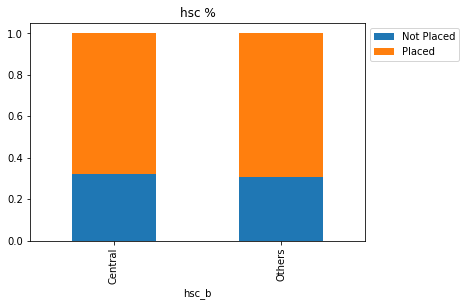

In [ ]:

hsc=pd.crosstab(data.hsc_b,data.status)
hsc.div(hsc.sum(1),axis=0).plot(kind="bar", stacked=True,title='hsc %');
plt.legend(bbox_to_anchor =(1, 1));


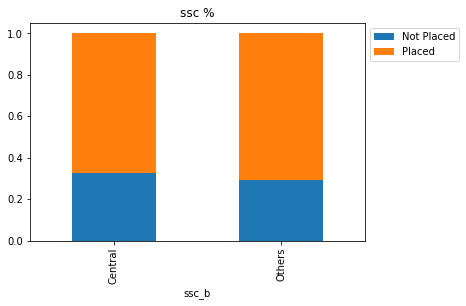

In [ ]:
ssc=pd.crosstab(data.ssc_b,data.status)
ssc.div(ssc.sum(1),axis=0).plot(kind="bar", stacked=True,title='ssc %');
plt.legend(bbox_to_anchor =(1, 1));

**Inference**
*  Proportion of candidates from Central and Others boards getting placed is more or less the same in hsc and ssc.
*  So board of hsc and ssc doesn't matter recruitment process.
* so we can drop these columns.

####**f. Does work experience matter?**

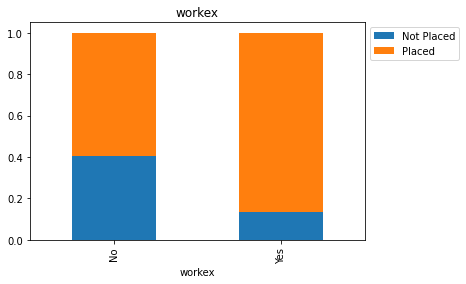

In [ ]:
workex=pd.crosstab(data.workex,data.status)
workex.div(workex.sum(1),axis=0).plot(kind="bar", stacked=True,title='workex');
plt.legend(bbox_to_anchor =(1, 1));


**Inference**


*   Candidates with work experience have been placed more than those having no experience
*   So here we can say that work experience helps in getting placed



####**g. Is there any gender bias?**

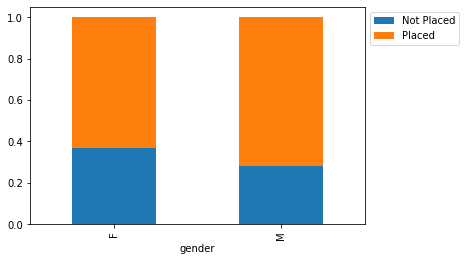

In [ ]:
gender=pd.crosstab(data.gender,data.status)
gender.div(gender.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True);
plt.legend(bbox_to_anchor =(1, 1));

In [ ]:
!pip install plotly_express 

In [ ]:

import plotly_express as px
px.violin(data_placed,y="salary",x="specialisation",color="gender",box=True,points="all")


**Inference**


*   More male candidates were placed compared to female candidates
*   The top salaries were given to male in both the specialisations.
*   Most candidates got salary between 2L-3L across all genders and specialisations.





####**h. Does percentage matter for one to get placed?**



**SSC %**

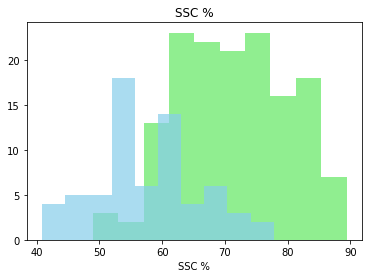

In [ ]:
data_notplaced=data[data.status=='Not Placed']
plt.hist(data_placed.ssc_p,color='lightgreen')
plt.hist(data_notplaced.ssc_p,alpha=0.7,color='skyblue')
plt.xlabel('SSC %')
plt.title('SSC %')
plt.show()

**hsc %**

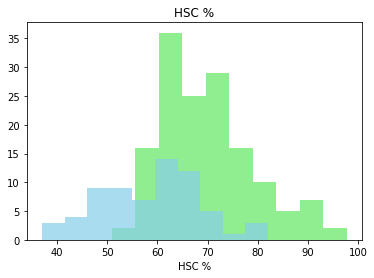

In [ ]:
plt.hist(data_placed.hsc_p,color='lightgreen')
plt.hist(data_notplaced.hsc_p,alpha=0.7,color='skyblue')
plt.xlabel('HSC %')
plt.title('HSC %')
plt.show()

**Degree %**

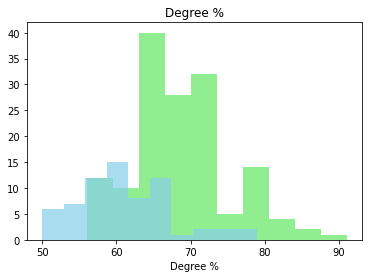

In [ ]:
plt.hist(data_placed.degree_p,color='lightgreen')
plt.hist(data_notplaced.degree_p,alpha=0.7,color='skyblue')
plt.xlabel('Degree %')
plt.title('Degree %')
plt.show()

**Inference (ssc %, hsc %, degree %)**

*   Candidates who has high score in ssc, hsc and undergrad got placed.
*   But there are some candidates having low scores and getting placed and having high scores and not getting placed.



**MBA test %**

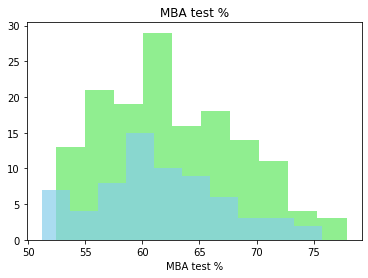

In [ ]:
plt.hist(data_placed.mba_p,color='lightgreen')
plt.hist(data_notplaced.mba_p,alpha=0.7,color='skyblue')
plt.xlabel('MBA test %')
plt.title('MBA test %')
plt.show()

**Inference**
*  Comparitively there's a slight difference between the percentage scores between both the groups, but still placed candidates has an upper hand when it comes to numbers. 
*  So as per the plot, MBA percentage does not influence the placement status.

#**5. Data Preprocessing**

####**a. Label Encoding** (for the categorical columns having only two types of classes)



In [ ]:
cols = ['gender','workex','specialisation','status']
data[cols]=data[cols].apply(LabelEncoder().fit_transform)
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


####**b. One-hot Encoding** (for categorical columns having more than two types of classes)

In [ ]:
dummy_hsc_s=pd.get_dummies(data['hsc_s'],prefix='hsc')
dummy_degree_t=pd.get_dummies(data['degree_t'],prefix='degree')

data_final=pd.concat([data,dummy_hsc_s,dummy_degree_t],axis=1)
data_final.drop(['hsc_s','degree_t','hsc_b','ssc_b','salary'],axis=1,inplace=True)
data_final.head(10)

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,hsc_Arts,hsc_Commerce,hsc_Science,degree_Comm&Mgmt,degree_Others,degree_Sci&Tech
0,1,67.00,91.00,58.00,0,55.00,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.50,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.00,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.00,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.80,0,55.50,1,0,1,0,1,0,0
5,1,55.00,49.80,67.25,1,55.00,0,51.58,0,0,0,1,0,0,1
6,0,46.00,49.20,79.00,0,74.28,0,53.29,0,0,1,0,1,0,0
7,1,82.00,64.00,66.00,1,67.00,0,62.14,1,0,0,1,0,0,1
8,1,73.00,79.00,72.00,0,91.34,0,61.29,1,0,1,0,1,0,0
9,1,58.00,70.00,61.00,0,54.00,0,52.21,0,0,1,0,1,0,0


####**c. Assigning target and predictor variable and Train Test split**

In [ ]:
X = data_final.drop(['status'],axis = 1)
Y = data_final.status
X_train,x_test,Y_train,y_test = train_test_split(X,Y,train_size = 0.8,random_state = 1)

In [ ]:
print('y',Y.value_counts(),sep='\n')
print()
print('y_train',Y_train.value_counts(),sep='\n')

y
1    148
0     67
Name: status, dtype: int64

y_train
1    120
0     52
Name: status, dtype: int64


Dataset is imbalanced. Problem is that models trained on imbalanced datasets often have poor results when they have to generalize.

##**SMOTE resampling on training set**

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
smote= SMOTE(random_state=42)
x_train,y_train = smote.fit_resample(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)


In [ ]:
y_train.value_counts()

1    120
0    120
dtype: int64

#**6. Machine Learning Models**

###**Our objective is to predict whether a student is placed or not**

##**a. Logistic Regression**

In [ ]:
warnings.filter = warnings.simplefilter('ignore')
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(x_test, y_test)))
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(logreg.score(x_train, y_train)))

Accuracy of logistic regression classifier on test set: 0.884
Accuracy of logistic regression classifier on train set: 0.896


Hyperparameter Tuning for Logistic Regression

In [ ]:
param_grid=[{'penalty':['l1','l2','elasticnet','none'],
             'C':np.logspace(-4,4,20),
             'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
             'max_iter':[100,200,1000,2500,5000]}]

In [ ]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(logreg,param_grid,cv=3,verbose=True,n_jobs=-1)

In [ ]:
best_clf=clf.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 2000 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 2420 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 3920 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  2.1min finished


In [ ]:
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
best_ypred=clf.predict(x_test)

In [ ]:
print('Accuracy of logistic regression classifier(best) on test set: {:.3f}'.format(best_clf.score(x_test, y_test)))
print('Accuracy of logistic regression classifier(best) on train set: {:.3f}'.format(best_clf.score(x_train, y_train)))

Accuracy of logistic regression classifier(best) on test set: 0.860
Accuracy of logistic regression classifier(best) on train set: 0.912


* Here we can see that test and train accuracies before and after tuning is almost same

Confusion matrix and Classification report 

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test,y_pred))


Confusion Matrix:
 [[13  2]
 [ 3 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.93      0.89      0.91        28

    accuracy                           0.88        43
   macro avg       0.87      0.88      0.87        43
weighted avg       0.89      0.88      0.88        43



**Insights**
* From confusion matrix we get that there are 13+25 correct predictions and 2+3 incorrect predictions.
* Here we want that precision value should be high because in hiring we need to avoid type I error. In hiring, a false positive is when we think an employee is a good, but actually he is not.
* Precision is 0.93 and accuracy is 0.88 which is good.

Performance of model through ROC curve

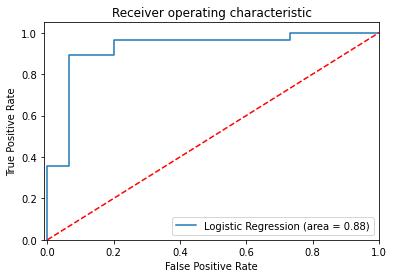

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

From the ROC curve we can infer that our logistic model has classified the placed students correctly rather than predicting false positive. The more the ROC curve(blue) lies towards the top left side the better our model is.

##**b. Decision Tree**

In [ ]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
y_pred_dt= dt.predict(x_test)
print('Accuracy of Decision Tree classifier on test set: {:.3f}'.format(dt.score(x_test, y_test)))
print('Accuracy of Decision Tree classifier on train set: {:.3f}'.format(dt.score(x_train, y_train)))

Accuracy of Decision Tree classifier on test set: 0.767
Accuracy of Decision Tree classifier on train set: 1.000


Here we can see that model is overfit.

Hyperparameter Tuning for Decision Tree

In [ ]:
param_grid_dt={'criterion':['gini','entropy'],'max_depth':[2,3,4,5],'max_features':('auto','sqrt','log2'),'min_samples_split':(2,4,6)}

In [ ]:
clf_dt=GridSearchCV(dt,param_grid_dt,n_jobs=-1,verbose=True,cv=5) 

In [ ]:
clf_dt.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
clf_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
best_ypred_dt=clf_dt.predict(x_test)

In [ ]:
print('Accuracy of Decision Tree(Best) classifier on test set: {:.3f}'.format(clf_dt.score(x_test, y_test)))
print('Accuracy of Decision Tree(Best) classifier on train set: {:.3f}'.format(clf_dt.score(x_train, y_train)))

Accuracy of Decision Tree(Best) classifier on test set: 0.744
Accuracy of Decision Tree(Best) classifier on train set: 0.842


Confusion matrix and Classification report

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,best_ypred_dt)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,best_ypred_dt))

Confusion Matrix:
 [[11  4]
 [ 7 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.73      0.67        15
           1       0.84      0.75      0.79        28

    accuracy                           0.74        43
   macro avg       0.73      0.74      0.73        43
weighted avg       0.76      0.74      0.75        43



Here Precision value is not good. So the model is not good.

##**c. Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print('Accuracy of Random Forest classifier on test set: {:.3f}'.format(rf.score(x_test, y_test)))
print('Accuracy of Random Forest classifier on train set: {:.3f}'.format(rf.score(x_train, y_train)))

Accuracy of Random Forest classifier on test set: 0.907
Accuracy of Random Forest classifier on train set: 1.000


Model is overfit

Hyperparameter Tuning for Random Forest

In [ ]:
# Number of trees in random forest
n_estimators =[20,60,100,120]
# Number of features to consider at every split
max_features = [0.2,0.6,1.0]
# Maximum number of levels in tree
max_depth = [2,4,8,None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion=['gini','entropy']

In [ ]:
param_grid_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,'criterion':criterion}

In [ ]:
clf_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 5, verbose=2, n_jobs = -1)

In [ ]:
clf_rf.fit(x_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1284 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2014 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2904 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:  6.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [ ]:
clf_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
best_ypred_rf=clf_rf.predict(x_test)

In [ ]:
print('Accuracy of Random Forest(Best) classifier on test set: {:.3f}'.format(clf_rf.score(x_test, y_test)))
print('Accuracy of Random Forest(Best) classifier on train set: {:.3f}'.format(clf_rf.score(x_train, y_train)))

Accuracy of Random Forest(Best) classifier on test set: 0.884
Accuracy of Random Forest(Best) classifier on train set: 0.983


Confusion matrix and Classification report

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,best_ypred_rf)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,best_ypred_rf))

Confusion Matrix:
 [[11  4]
 [ 1 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.87      0.96      0.92        28

    accuracy                           0.88        43
   macro avg       0.89      0.85      0.87        43
weighted avg       0.89      0.88      0.88        43



Precision and accuracy is good. Model is Performing well after hyperparameter tuning.

##**d. Naive Bayes**

In [ ]:
from sklearn.naive_bayes import BernoulliNB 
nb = BernoulliNB() 
nb.fit(x_train, y_train) 
  
#Applying and predicting 
y_pred_nb = nb.predict(x_test) 

print('Accuracy of Naive Bayes classifier on test set: {:.3f}'.format(nb.score(x_test, y_test)))
print('Accuracy of Naive Bayes classifier on train set: {:.3f}'.format(nb.score(x_train, y_train)))

Accuracy of Naive Bayes classifier on test set: 0.721
Accuracy of Naive Bayes classifier on train set: 0.725


Here test and train accuracies are same but low.

Hyperparameter Tuning for Naive Bayes

In [ ]:
para_gird_nb={'alpha':[0.01,0.1,0.5,1,10]}

In [ ]:
clf_nb=GridSearchCV(nb,para_gird_nb,n_jobs=-1,cv=5,verbose=5)

In [ ]:
clf_nb.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [ ]:
clf_nb.best_estimator_

BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
best_ypred_nb=clf_nb.predict(x_test)

In [ ]:
print('Accuracy of Naive Bayes classifier on test set: {:.3f}'.format(clf_nb.score(x_test, y_test)))
print('Accuracy of Naive Bayes classifier on train set: {:.3f}'.format(clf_nb.score(x_train, y_train)))

Accuracy of Naive Bayes classifier on test set: 0.674
Accuracy of Naive Bayes classifier on train set: 0.729


Even after hyperparameter tuning we are getting almost same accuracies.

Confusion matrix and Classification report

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred_nb))

Confusion Matrix:
 [[10  5]
 [ 7 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.67      0.62        15
           1       0.81      0.75      0.78        28

    accuracy                           0.72        43
   macro avg       0.70      0.71      0.70        43
weighted avg       0.73      0.72      0.72        43



Here accuracy is not high but precision is pretty high but not high as compared to logistics

##**e. SVM**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',probability=True)
svclassifier.fit(x_train, y_train)
y_pred_svm = svclassifier.predict(x_test)
print('Accuracy of SVM  on test set: {:.3f}'.format(svclassifier.score(x_test, y_test)))
print('Accuracy of SVM  on train set: {:.3f}'.format(svclassifier.score(x_train, y_train)))


Accuracy of SVM  on test set: 0.907
Accuracy of SVM  on train set: 0.912


Train and test accuracies are very good.

In [ ]:
confusion_matrix = confusion_matrix(y_test,y_pred_svm)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,y_pred_svm))

Confusion Matrix:
 [[14  1]
 [ 3 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.96      0.89      0.93        28

    accuracy                           0.91        43
   macro avg       0.89      0.91      0.90        43
weighted avg       0.91      0.91      0.91        43



Accuracy and Precision both are high.


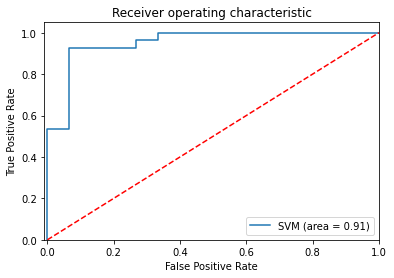

In [ ]:
svm_roc_auc = roc_auc_score(y_test, svclassifier.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, svclassifier.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

From the ROC curve we can infer that our SVM model has classified the placed students correctly rather than predicting false positive. Area under the curve is 0.91 which shows that model is good.

##**f. K-Nearest Neighbours**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit_transform(x_train)
ss.transform(x_test)

array([[ 0.82956653, -0.35098277,  1.6209983 ,  0.54981513, -0.71984877,
         1.01238644, -1.07073162, -0.66523625, -0.29984938,  1.10282675,
        -0.9552819 ,  0.76340028, -0.28056555, -0.65151175],
       [ 0.82956653,  1.66968449,  1.25917689, -0.56758695,  1.52826732,
         1.37569977, -1.07073162,  1.60429872, -0.29984938,  1.10282675,
        -0.9552819 ,  0.76340028, -0.28056555, -0.65151175],
       [ 0.82956653, -0.34374348, -1.27357297, -1.54531376, -0.71984877,
        -0.02337522, -1.07073162,  0.59980665, -0.29984938, -1.00638581,
         1.15909238, -1.49980793, -0.28056555,  1.75078314],
       [ 0.82956653,  1.54933126,  2.34464112,  2.50526876, -0.71984877,
         0.69369055,  1.02147002,  1.94198633, -0.29984938,  1.10282675,
        -0.9552819 ,  0.76340028, -0.28056555, -0.65151175],
       [ 0.82956653, -0.94822433, -0.26770946, -1.23802819, -0.71984877,
        -0.34207112,  1.02147002,  0.07870497, -0.29984938,  1.10282675,
        -0.9552819 ,  0.76

In [ ]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

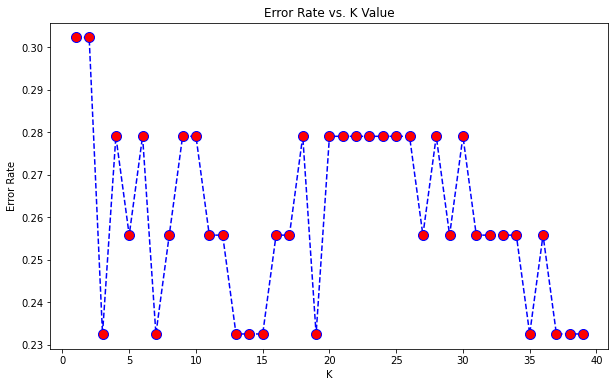

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print('Accuracy of KNN classifier on test set: {:.3f}'.format(knn.score(x_test, y_test)))
print('Accuracy of KNN classifier on train set: {:.3f}'.format(knn.score(x_train, y_train)))

Accuracy of KNN classifier on test set: 0.767
Accuracy of KNN classifier on train set: 0.958


Model is overfit

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred_knn))

Confusion Matrix:
 [[ 9  6]
 [ 4 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.80      0.86      0.83        28

    accuracy                           0.77        43
   macro avg       0.75      0.73      0.74        43
weighted avg       0.76      0.77      0.76        43



Precision and accuracy both are low. Therefore this model is not good.

#**Conclusion**
Comparing all the applied models, it is evident the SVM is performing the best with a precision and accuracy score of 0.96 and 0.91 respectively. The AUC of SVM is also the highest. Hence, we choose SVM as our final model.

**Other Findings**
1.	Type of board does not play any part in the scope of getting placed.

2.	There are no gender discrimination while hiring, but higher packages were given to male.

3.	Surprisingly, educational percentages are highly influential for a candidate to get placed – especially 10th and 12th class percentages.

4.	MBA in Marketing and Finance pays higher than MBA in Marketing and HR.
